import libraries

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

read met eireann data

In [3]:
#Cork Airport (South):
dswind = pd.read_csv('hly3904/hly3904.csv',skiprows=24,usecols=[0,11,12,13,14], header=None, skipinitialspace=True, names = ["date","speed_ind","speed","dir_ind","direction"], index_col =0, parse_dates=True)
dswind = dswind[(dswind.speed_ind==2)&(dswind.dir_ind==2)&(dswind.speed!=0)&(dswind.index.year>1991)&(dswind.index.year<2022)]
dswind.speed = dswind.speed*(0.514)
dswind

,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,6.682,2,220
1992-01-01 01:00:00,2,11.308,2,220
1992-01-01 02:00:00,2,12.336,2,230
1992-01-01 03:00:00,2,9.252,2,240
1992-01-01 04:00:00,2,10.280,2,250
...,...,...,...,...
2021-12-31 19:00:00,2,7.710,2,150
2021-12-31 20:00:00,2,7.710,2,160
2021-12-31 21:00:00,2,7.710,2,170


define event actual data and climate data

In [4]:
Ophelia = dswind[(dswind.index.year==2017)&(dswind.index.month==10)&(dswind.index.day==16)]

climate = np.zeros((24))
for HH in range(24):
    climate[HH] = dswind.speed[(dswind.index.month==10)&(dswind.index.hour==HH)].quantile(q=0.5)
    
Octobers = dswind[(dswind.index.month==10)]
Octobermaxs = Octobers.groupby([Octobers.index.year,Octobers.index.day]).max()
Octobermins = Octobers.groupby([Octobers.index.year,Octobers.index.day]).min()

import ERA5 data and forecast data

In [5]:
era5 = np.genfromtxt("./era5.txt",delimiter=',')
sameday = np.genfromtxt("./sameday.txt",delimiter=',')
oneday = np.genfromtxt("./oneday.txt",delimiter=',')
threeday = np.genfromtxt("./threeday.txt",delimiter=',')
sevenday = np.genfromtxt("./sevenday.txt",delimiter=',')

In [6]:
Ophelia.speed.values

array([ 5.654,  4.626,  5.654,  8.224, 11.308, 11.822, 11.822, 14.392,
       16.448, 15.934, 19.532, 22.102, 19.018, 16.962, 16.448, 13.364,
       15.934, 16.448, 14.906, 12.85 , 12.336,  9.766,  9.252,  6.682])

Text(0.5, 1.0, 'Hourly mean wind speed (m/s) time series')

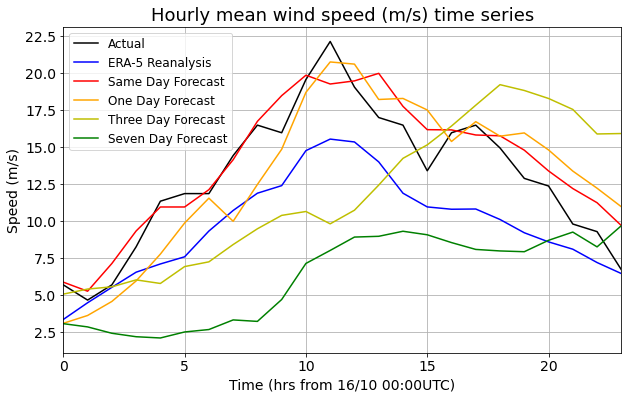

In [7]:
#Wind
fig, ax = plt.subplots(figsize=[10,6])
plt.plot(Ophelia.speed.values,'k',markersize=24,label='Actual')
plt.plot(era5,'b',label='ERA-5 Reanalysis')
plt.plot(sameday,'r',label='Same Day Forecast')
plt.plot(oneday,'orange',label='One Day Forecast')
plt.plot(threeday,'y',label='Three Day Forecast')
plt.plot(sevenday,'g',label='Seven Day Forecast')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,23)
plt.legend(loc='best',fontsize=12)
plt.xlabel('Time (hrs from 16/10 00:00UTC)',fontsize=14)
plt.ylabel('Speed (m/s)',fontsize=14)
plt.title('Hourly mean wind speed (m/s) time series',fontsize=18)

errors

Text(0.5, 1.0, 'Hourly mean wind speed (m/s) absolute errors')

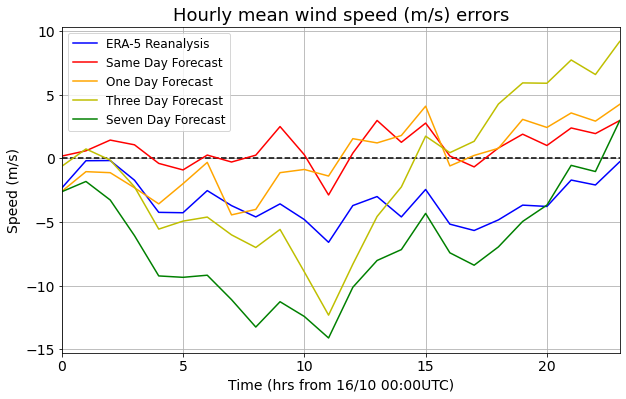

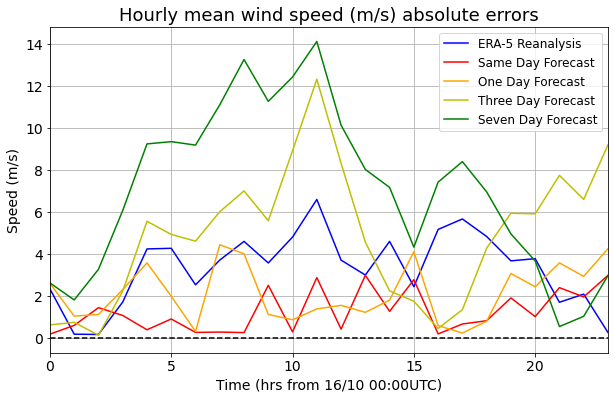

In [8]:
era5_error = era5 - Ophelia.speed.values
sameday_error = sameday - Ophelia.speed.values
oneday_error = oneday - Ophelia.speed.values
threeday_error = threeday - Ophelia.speed.values
sevenday_error = sevenday - Ophelia.speed.values

fig, ax = plt.subplots(figsize=[10,6])
plt.plot(era5_error,'b',label='ERA-5 Reanalysis')
plt.plot(sameday_error,'r',label='Same Day Forecast')
plt.plot(oneday_error,'orange',label='One Day Forecast')
plt.plot(threeday_error,'y',label='Three Day Forecast')
plt.plot(sevenday_error,'g',label='Seven Day Forecast')
plt.hlines(0,0,23,color='k',linestyle='dashed')
plt.grid(True)
plt.xlim(0,23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.xlabel('Time (hrs from 16/10 00:00UTC)',fontsize=14)
plt.ylabel('Speed (m/s)',fontsize=14)
plt.title('Hourly mean wind speed (m/s) errors',fontsize=18)

fig, ax = plt.subplots(figsize=[10,6])
plt.plot(np.abs(era5_error),'b',label='ERA-5 Reanalysis')
plt.plot(np.abs(sameday_error),'r',label='Same Day Forecast')
plt.plot(np.abs(oneday_error),'orange',label='One Day Forecast')
plt.plot(np.abs(threeday_error),'y',label='Three Day Forecast')
plt.plot(np.abs(sevenday_error),'g',label='Seven Day Forecast')
plt.hlines(0,0,23,color='k',linestyle='dashed')
plt.grid(True)
plt.xlim(0,23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.xlabel('Time (hrs from 16/10 00:00UTC)',fontsize=14)
plt.ylabel('Speed (m/s)',fontsize=14)
plt.title('Hourly mean wind speed (m/s) absolute errors',fontsize=18)

biases

In [9]:
era5_bias = era5_error.mean()
sameday_bias = sameday_error.mean()
oneday_bias = oneday_error.mean()
threeday_bias = threeday_error.mean()
sevenday_bias = sevenday_error.mean()

print('ERA-5 bias: %.3f' % era5_bias)
print('Same day bias: %.3f' % sameday_bias)
print('One day bias: %.3f' % oneday_bias)
print('Three day bias: %.3f' % threeday_bias)
print('Seven day bias: %.3f' % sevenday_bias)

ERA-5 bias: -3.318
Same day bias: 0.843
One day bias: 0.027
Three day bias: -1.212
Seven day bias: -6.809


MAEs

In [10]:
era5_mae = np.abs(era5_error).mean()
sameday_mae = np.abs(sameday_error).mean()
oneday_mae = np.abs(oneday_error).mean()
threeday_mae = np.abs(threeday_error).mean()
sevenday_mae = np.abs(sevenday_error).mean()

print('ERA-5 MAE: %.3f' % era5_mae)
print('Same day MAE: %.3f' % sameday_mae)
print('One day MAE: %.3f' % oneday_mae)
print('Three day MAE: %.3f' % threeday_mae)
print('Seven day MAE: %.3f' % sevenday_mae)

ERA-5 MAE: 3.318
Same day MAE: 1.269
One day MAE: 2.139
Three day MAE: 4.876
Seven day MAE: 7.056


RMSEs

In [11]:
era5_rmse = np.sqrt((era5_error**2).mean())
sameday_rmse = np.sqrt((sameday_error**2).mean())
oneday_rmse = np.sqrt((oneday_error**2).mean())
threeday_rmse = np.sqrt((threeday_error**2).mean())
sevenday_rmse = np.sqrt((sevenday_error**2).mean())

print('ERA-5 RMSE: %.3f' % era5_rmse)
print('Same day RMSE: %.3f' % sameday_rmse)
print('One day RMSE: %.3f' % oneday_rmse)
print('Three day RMSE: %.3f' % threeday_rmse)
print('Seven day RMSE: %.3f' % sevenday_rmse)

ERA-5 RMSE: 3.722
Same day RMSE: 1.609
One day RMSE: 2.507
Three day RMSE: 5.799
Seven day RMSE: 8.048


Accuracies

In [12]:
era5_acc = ((era5 - climate)*(Ophelia.speed.values - climate)).mean()/np.sqrt((((era5 - climate)**2).mean())*(((Ophelia.speed.values - climate)**2).mean()))
sameday_acc = ((sameday - climate)*(Ophelia.speed.values - climate)).mean()/np.sqrt((((sameday - climate)**2).mean())*(((Ophelia.speed.values - climate)**2).mean()))
oneday_acc = ((oneday - climate)*(Ophelia.speed.values - climate)).mean()/np.sqrt((((oneday - climate)**2).mean())*(((Ophelia.speed.values - climate)**2).mean()))
threeday_acc = ((threeday - climate)*(Ophelia.speed.values - climate)).mean()/np.sqrt((((threeday - climate)**2).mean())*(((Ophelia.speed.values - climate)**2).mean()))
sevenday_acc = ((sevenday - climate)*(Ophelia.speed.values - climate)).mean()/np.sqrt((((sevenday - climate)**2).mean())*(((Ophelia.speed.values - climate)**2).mean()))

print('ERA-5 ACC: %.3f' % era5_acc)
print('Same day ACC: %.3f' % sameday_acc)
print('One day ACC: %.3f' % oneday_acc)
print('Three day ACC: %.3f' % threeday_acc)
print('Seven day ACC: %.3f' % sevenday_acc)

ERA-5 ACC: 0.989
Same day ACC: 0.989
One day ACC: 0.966
Three day ACC: 0.796
Seven day ACC: 0.583


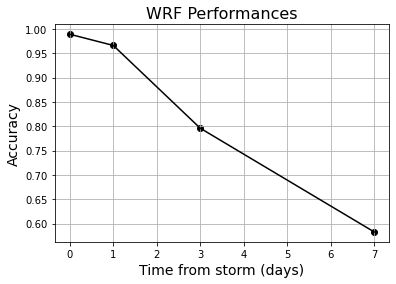

In [21]:
times = np.array([0,1,3,7])
performance = np.array([0.989,0.966,0.796,0.583])
plt.plot(times,performance,'k')
plt.scatter(times,performance,color='k')
plt.xlabel('Time from storm (days)',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('WRF Performances',fontsize=16)
plt.grid(True)

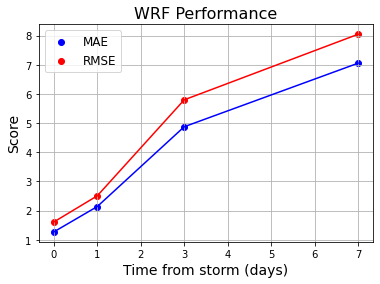

In [23]:
maes = np.array([1.269,2.139,4.876,7.056])
rmses = np.array([1.609,2.507,5.799,8.048])

plt.plot(times,maes,'b')
plt.scatter(times,maes,color='b',label='MAE')
plt.plot(times,rmses,'r')
plt.scatter(times,rmses,color='r',label='RMSE')
plt.xlabel('Time from storm (days)',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.title('WRF Performance',fontsize=16)
plt.grid(True)
plt.legend(loc='best',fontsize=12)